# E-Commerce Sales Analysis Project
1. Calculated the monthly sales of the store and indentify which month had the highest sales and which month had the lowest sales.
2. Analyze sales based on product categories and determine which category has the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories.
4. You need to analyze the monthly profit from sales and determine which month had the highest profit.
5. Analyze the profit by category and sub-category.
6. Analyze the sales and profit by customer segment.
7. Analyze the sales to profit ratio.

In [27]:
import pandas as pd # data cleaning
import plotly.express as px # for visualization
import plotly.graph_objects as go # create Advance and customize graph
import plotly.io as pio # graph templates
import plotly.colors as color # colors
pio.templates.defult = 'plotly_white' # theme white
df = pd.read_csv('./E - commerce data.csv')# encoding = 'latin-1') # encoding = lain-1 (for read special characters)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [28]:
df.shape

(9994, 21)

In [29]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

# Convert dates columns

In [11]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [12]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [13]:
df['Order Month'] = df['Order Date'].dt.month
df['Order year'] = df['Order Date'].dt.year
df['Order Day of  week'] = df['Order Date'].dt.dayofweek
df.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month,Order year,Order Day of week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


# Monthly sales analysis

In [14]:
Sales_by_month = df.groupby(['Order Month'])['Sales'].sum().reset_index()
Sales_by_month

,Order Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


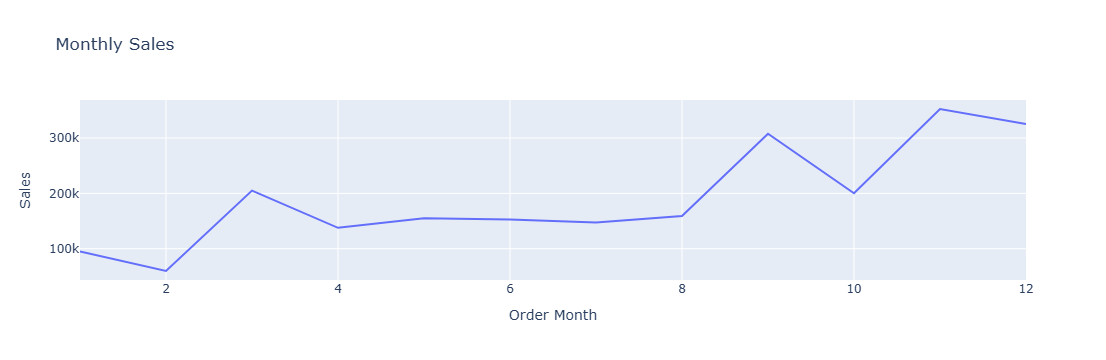

In [26]:
fig = px.line(Sales_by_month, x ='Order Month',y = 'Sales',title = ' Monthly Sales')
fig.show()

# Sales by Category

In [16]:
Sales_by_Category = df.groupby(['Category'])['Sales'].sum().reset_index()
Sales_by_Category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [17]:
fig = px.pie(Sales_by_Category,values='Sales',names='Category',hole=0.3,color_discrete_sequence=['#D62576'])
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category',title_font=dict(size=25))
fig.show()

# Sales analysis by sub categories

In [18]:
Sales_by_sub_categories = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()
Sales_by_sub_categories

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


In [19]:
fig =px.bar(Sales_by_sub_categories,x = 'Sub-Category',y='Sales',color='Sub-Category', title =' Sales by sub categories')
fig.show()

# Monthly profit analysis

In [20]:
profit_by_month = df.groupby(['Order Month'])['Profit'].sum().reset_index()
profit_by_month

,Order Month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [21]:
fig = px.bar(profit_by_month, x ='Order Month',y='Profit',color='Order Month',title='Profit by Month')
fig.show()

# Profit_by_category

In [22]:
profit_by_category = df.groupby(['Category'])['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [23]:
fig = px.pie(profit_by_category,names='Category',values='Profit',hole=0.3,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Profit analysis by Category', title_font=dict(size=24))
fig.show()

# profit by sub categories

In [24]:
profit_by_sub_category = df.groupby(['Sub-Category'])['Profit'].sum().reset_index()
profit_by_sub_category

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [25]:
fig = px.bar(profit_by_sub_category, x ='Sub-Category',y='Profit',color='Sub-Category',title='Profit by sub categories')
fig.show()

# Sales and Profit by Customer segment

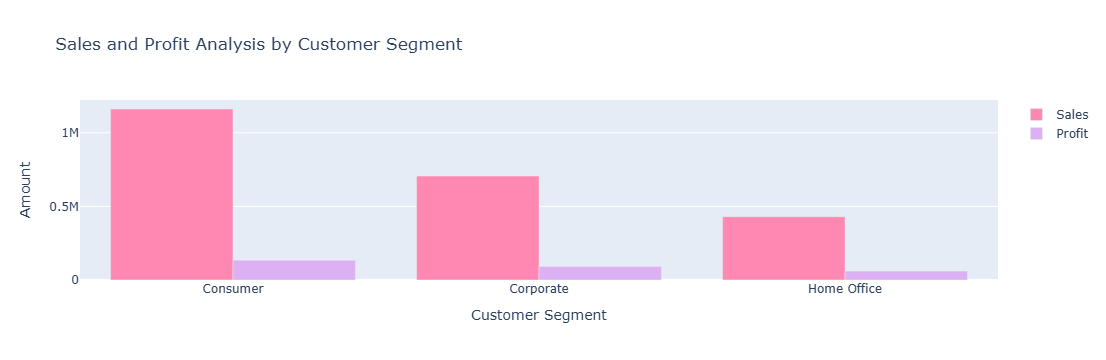

In [70]:
Sales_Profit_by_segment = df.groupby(['Segment']).agg({'Sales':'sum','Profit':'sum'}).reset_index()
Sales_Profit_by_segment
color_palette = color.qualitative.Pastel
fig = go.Figure()
fig.add_trace(go.Bar(x=Sales_Profit_by_segment['Segment'],
                     y=Sales_profit_by_segment['Sales'],
                     name='Sales',
                     marker_color=color_palette[6]))

fig.add_trace(go.Bar(x=Sales_Profit_by_segment['Segment'],
                     y=Sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=color_palette[3]))
fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment',yaxis_title='Amount')
fig.show()

# Sales to Profit Ratio (Sales by Profit)

In [78]:
Sales_profit_by_segment = df.groupby(['Segment']).agg({'Sales':'sum','Profit':'sum'}).reset_index()
Sales_profit_by_segment['Sales_to_Profit_Ratio'] = Sales_profit_by_segment['Sales'] / Sales_profit_by_segment['Profit']
print(Sales_profit_by_segment[['Segment','Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


NameError: name 'sx' is not defined

In [ ]:
monthly sales = highest sales nov , lowest sales jan
sales = tech, furniture, office supplies
sales sub-cate = phone
profit month = dec, jan 
profit = tech, 
customer segment = consumer, corpurate
profit ratio
